In [1]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([('A','B'),('B','C')])

Interesting way of creating a graph. Now how to draw the graphs???

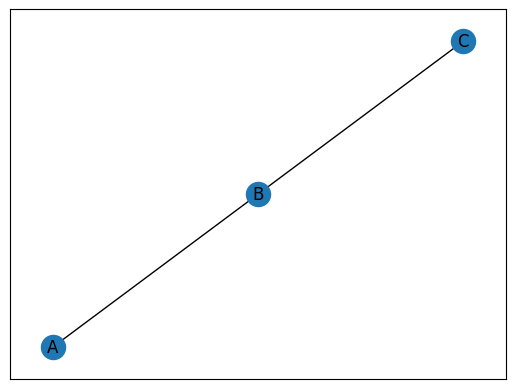

In [4]:
nx.draw_networkx(G)

This looks like a undirected graph. How to create directed graph?

In [5]:
G = nx.DiGraph()
G.add_edges_from([('A','B'),('B','C')])

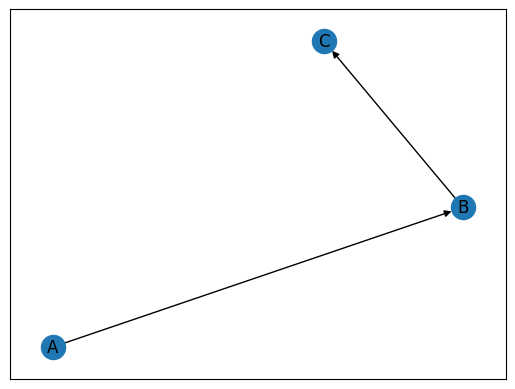

In [6]:
nx.draw_networkx(G)

Now suppose I need to create a road network with weights as distance between the cities. How to do this?

{('Tirur', 'Calicut'): Text(0.49999999999999983, -0.3140713757161202, '50'),
 ('Tirur', 'Mangalam'): Text(-0.4089429420899733, 0.25687454482319083, '14')}

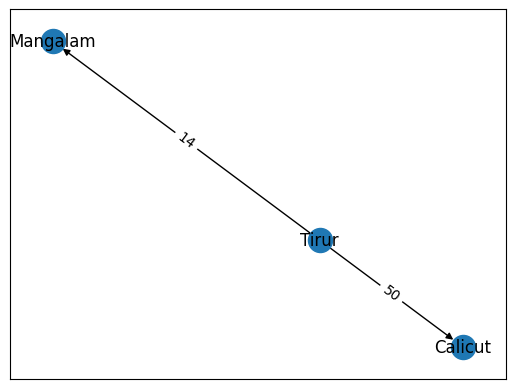

In [14]:
G = nx.DiGraph()
G.add_edges_from([('Tirur','Calicut',{"weight":50}),('Tirur','Mangalam',{"weight":14})])
labels = nx.get_edge_attributes(G,"weight")
nx.draw_networkx(G,pos=nx.spring_layout(G, seed=0))
nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G, seed=0),edge_labels=labels)

Here some how the node position has to be given for the edge label to work. Don't know why though 🤷. This is done with the help of spring layout.

Connected graphs have lot of interesting and useful properties. How to check if a graph is connected?

In [16]:
G = nx.Graph()
G.add_edges_from([('A','B'),('B','C'),('D','E')])
nx.is_connected(G)

False

It works for undirected graph but not for directed graph. It is not still implemented.

Now another unique property of the graphs in the in degree and outdegree.

In [17]:
G = nx.Graph()
G.add_edges_from([('A','B'),('B','C'),('D','E')])
G.degree('B')

2

In [19]:
G = nx.DiGraph()
G.add_edges_from([('A','B'),('B','C')]) 
print(G.in_degree('B'))
print(G.out_degree('B'))

1
1


Interesting concept of centrality. It is used to measure the importance of various nodes in a graph. There are different types of centrality.
Good wikipedia article on this: https://en.wikipedia.org/wiki/Centrality

In [22]:
print(nx.degree_centrality(G)) # power in terms of degree
print(nx.betweenness_centrality(G)) # power in terms of mediator role
print(nx.closeness_centrality(G)) # power in terms of shortest path
# print(nx.eigenvector_centrality(G))
print(nx.katz_centrality(G)) # general version of degree centrality
# many more......

{'A': 0.5, 'B': 1.0, 'C': 0.5}
{'A': 0.0, 'B': 0.5, 'C': 0.0}
{'A': 0.0, 'B': 0.5, 'C': 0.6666666666666666}
{'A': 0.5389993709611511, 'B': 0.5928993080572663, 'C': 0.5982893017668778}


Interesting to note that the [('A','B'),('B','C')] that we have is used is the form of edge which is better than using the adjacency matrix. We can also use adajency list to represent graphs

In [29]:
G = nx.Graph()
G.add_edges_from([('A','B'),('A','C'),('A','D'),('D','E'),('C','E')])

In [30]:
visited =[]
def bfs(G,start):
    visited,queue=[start],[start]
    while queue:
        node = queue.pop(0)
        for i in G[node]:
            if i not in visited:
                visited.append(i)
                queue.append(i)
    return visited
bfs(G,'A')

['A', 'B', 'C', 'D', 'E']

In [31]:
visited =[]
def dfs(G,start,visited):
    if start not in visited:
        visited.append(start)
        for i in G[start]:
            visited = dfs(G,i,visited)
    return visited
dfs(G,'A',visited)

['A', 'B', 'C', 'E', 'D']